In [ ]:
#                                                                      Uber Project

                                          
**Problem statement**

This project analyzes Uber ride request data to identify patterns in demand and supply across different times of day and locations. By examining request outcomes, time slots, and driver availability, we aim to uncover when and where service gaps occur. The insights will help improve resource allocation and reduce ride failures due to cancellations or unavailability of cars.


There are 6 columns in dataset

Request id : Unique identifier for each ride request

Pickup point : Location where the request originated – either City or Airport

Driver id : ID of the driver assigned to the request (if any); blank if unassigned

Status : Final status of the request: Completed, Cancelled, or No Cars Available

Request timestamp : Date and time when the user made the ride request

Drop timestamp : Date and time when the ride was completed (only available for completed trips)


I have cleaned dataset in excel and add some more columns for analysis **bold text** **bold text**

1. Replace ‘Driver id’ NA to 0

2. Extracted ‘Date’  from ‘Request timestamp’ column as Request date

3. Extracted ‘Date’ from ‘Drop timestamp’ column as Drop date. If no date is available filled with ‘NA’

4. Created ‘Time Slot column’ from ‘Request Hour’ as ‘Late Night’, Daytime, ‘Morning’, ‘Evening’, ‘Night’

5. Created ‘Day Classification’ column from ‘Request Date’ as ‘week day’ and ‘Weekend’

6. Calculate Trip Duration (min)

7. Created ‘Gap Status’ column from Status column as ‘Yes’ or ‘No’

8. 9.	Created ‘Driver Assigned’ column from ‘Driver id’ as ‘Yes’ or ‘No’

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [6]:
data = pd.read_csv('/content/Uber Request Data.csv')

In [7]:
data.head(5)

,Request_id,Pickup_point,Driver_id,Status,Request_timestamp,Drop_timestamp,Request_Date,Drop_Date,Request_Hour,Time_Slot,Day_Classification,Trip _Duration(min),Gap_Status,Driver_Assigned
0,619,Airport,1,Trip Completed,11-07-2016 11:51,11-07-2016 13:00,11-07-2016,11-07-2016,11,Daytime,Weekday,69,No,Yes
1,867,Airport,1,Trip Completed,11-07-2016 17:57,11-07-2016 18:47,11-07-2016,11-07-2016,17,Evening,Weekday,50,No,Yes
2,1807,City,1,Trip Completed,12-07-2016 09:17,12-07-2016 09:58,12-07-2016,12-07-2016,9,Morning,Weekday,41,No,Yes
3,2532,Airport,1,Trip Completed,12-07-2016 21:08,12-07-2016 22:03,12-07-2016,12-07-2016,21,Evening,Weekday,55,No,Yes
4,3112,City,1,Trip Completed,13-07-2016 08:33,13-07-2016 09:25,13-07-2016,13-07-2016,8,Morning,Weekday,52,No,Yes


In [12]:
data.tail(5)

,Request_id,Pickup_point,Driver_id,Status,Request_timestamp,Drop_timestamp,Request_Date,Drop_Date,Request_Hour,Time_Slot,Day_Classification,Trip _Duration(min),Gap_Status,Driver_Assigned
6740,6745,City,0,No Cars Available,15-07-2016 23:49,NaN,15-07-2016,NaN,23,Night,Weekday,0,Yes,No
6741,6752,Airport,0,No Cars Available,15-07-2016 23:50,NaN,15-07-2016,NaN,23,Night,Weekday,0,Yes,No
6742,6751,City,0,No Cars Available,15-07-2016 23:52,NaN,15-07-2016,NaN,23,Night,Weekday,0,Yes,No
6743,6754,City,0,No Cars Available,15-07-2016 23:54,NaN,15-07-2016,NaN,23,Night,Weekday,0,Yes,No
6744,6753,Airport,0,No Cars Available,15-07-2016 23:55,NaN,15-07-2016,NaN,23,Night,Weekday,0,Yes,No


In [8]:
data.columns

Index(['Request_id', 'Pickup_point', 'Driver_id', 'Status',
       'Request_timestamp', 'Drop_timestamp', 'Request_Date', 'Drop_Date',
       'Request_Hour', 'Time_Slot', 'Day_Classification',
       'Trip _Duration(min)', 'Gap_Status', 'Driver_Assigned'],
      dtype='object')

In [9]:
data.shape

(6745, 14)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Request_id           6745 non-null   int64 
 1   Pickup_point         6745 non-null   object
 2   Driver_id            6745 non-null   int64 
 3   Status               6745 non-null   object
 4   Request_timestamp    6745 non-null   object
 5   Drop_timestamp       2831 non-null   object
 6   Request_Date         6745 non-null   object
 7   Drop_Date            2831 non-null   object
 8   Request_Hour         6745 non-null   int64 
 9   Time_Slot            6745 non-null   object
 10  Day_Classification   6745 non-null   object
 11  Trip _Duration(min)  6745 non-null   int64 
 12  Gap_Status           6745 non-null   object
 13  Driver_Assigned      6745 non-null   object
dtypes: int64(4), object(10)
memory usage: 737.9+ KB


Data visualization

Univariate Analysis

In [13]:
# Value counts of Status
data['Status'].value_counts()

,count
Status,
Trip Completed,2831
No Cars Available,2650
Cancelled,1264


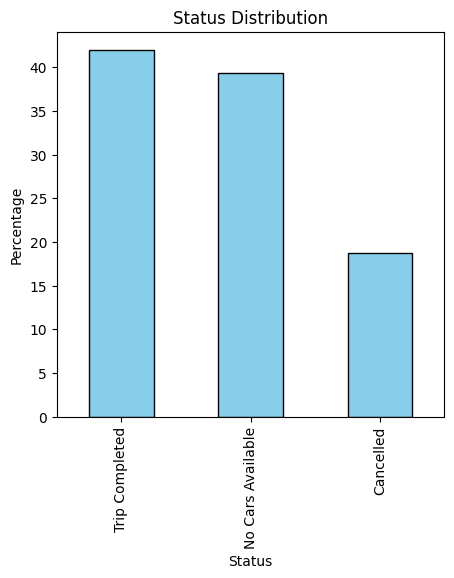

In [16]:
# Bar Chart of status
status_percent = data['Status'].value_counts(normalize=True) * 100
plt.figure(figsize=(5, 5))
status_percent.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Status Distribution')
plt.xlabel('Status')
plt.ylabel('Percentage')
plt.show()

The chart reveals that a significant portion of Uber ride requests were not completed, with "No Cars Available" and "Cancelled" statuses making up a large share. This indicates a notable demand-supply gap, especially during peak hours, where the number of available drivers falls short of user demand. Addressing this gap could lead to improved customer satisfaction and operational efficiency.

In [19]:
# Value counts of Time Slot
data['Time_Slot'].value_counts()

,count
Time_Slot,
Evening,2646
Morning,2346
Daytime,981
Late Night,578
Night,194


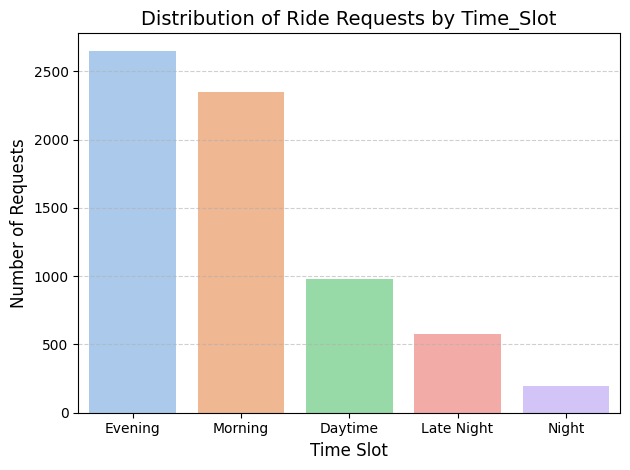

In [28]:
# Bar chart of Time_Slot
sns.countplot(x='Time_Slot', data=data, order=data['Time_Slot'].value_counts().index, palette='pastel')
plt.title('Distribution of Ride Requests by Time_Slot', fontsize=14)
plt.xlabel('Time Slot', fontsize=12)
plt.ylabel('Number of Requests', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

The chart highlights that Evening and Morning time slots experience the highest ride demand, together accounting for the majority of Uber requests. This pattern aligns with typical commuter hours, indicating that demand is heavily concentrated during work commute windows. In contrast, Late Night and Night slots see relatively fewer requests. These findings emphasize the need for optimized driver allocation during peak demand periods to minimize cancellations and improve service availability.

In [33]:
# value counts for "Gap status"
gap_by_pickup = data[data['Gap_Status'] == 'Yes'].groupby('Pickup_point').size()
gap_by_pickup

,0
Pickup_point,
Airport,1911
City,2003


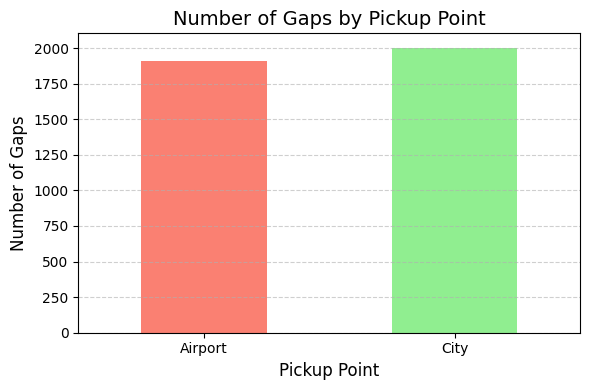

In [34]:
plt.figure(figsize=(6, 4))
gap_by_pickup.plot(kind='bar', color=['salmon', 'lightgreen'])
plt.title('Number of Gaps by Pickup Point', fontsize=14)
plt.xlabel('Pickup Point', fontsize=12)
plt.ylabel('Number of Gaps', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

The bar chart shows that both City and Airport pickup points experience a high and nearly equal number of demand-supply gaps, with the City slightly leading. This indicates that service reliability issues are present across both locations, and efforts to improve driver availability should be balanced between these two key hubs to reduce customer dissatisfaction and lost revenue.

<Axes: xlabel='Request_Hour', ylabel='count'>

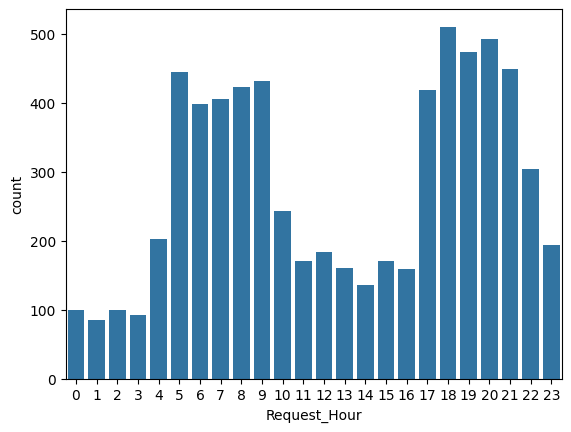

In [40]:
sns.countplot(x='Request_Hour', data=data)

The chart shows the distribution of ride requests across different hours of the day. There are clear peaks in demand during morning hours (around 6-9 AM) and evening hours (around 5-9 PM). These peaks correspond to typical commute times, indicating high demand during the start and end of the workday. Demand is relatively lower during the late night and early morning hours. This hourly breakdown of requests further supports the need for dynamic resource allocation to match driver supply with demand fluctuations throughout the day.

In [43]:
# Value counts of Day Classification
print(data['Day_Classification'].value_counts())

Day_Classification
Weekday    6745
Name: count, dtype: int64


In [44]:
# Value counts of Driver Assigned
print(data['Driver_Assigned'].value_counts())

Driver_Assigned
Yes    4095
No     2650
Name: count, dtype: int64


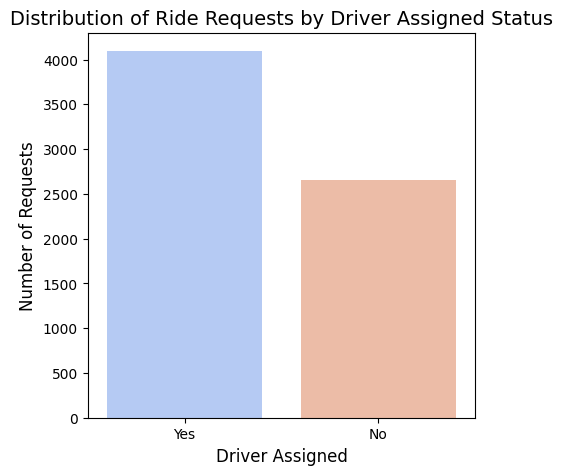

In [45]:
# Bar chart of Driver_Assigned
plt.figure(figsize=(5, 5))
sns.countplot(x='Driver_Assigned', data=data, palette='coolwarm')
plt.title('Distribution of Ride Requests by Driver Assigned Status', fontsize=14)
plt.xlabel('Driver Assigned', fontsize=12)
plt.ylabel('Number of Requests', fontsize=12)
plt.show()

The chart shows that a driver was assigned to the majority of ride requests. However, a significant number of requests still did not have a driver assigned. This indicates a potential area for improvement in driver availability or allocation to fulfill more ride requests.

 Bivariate Analysis

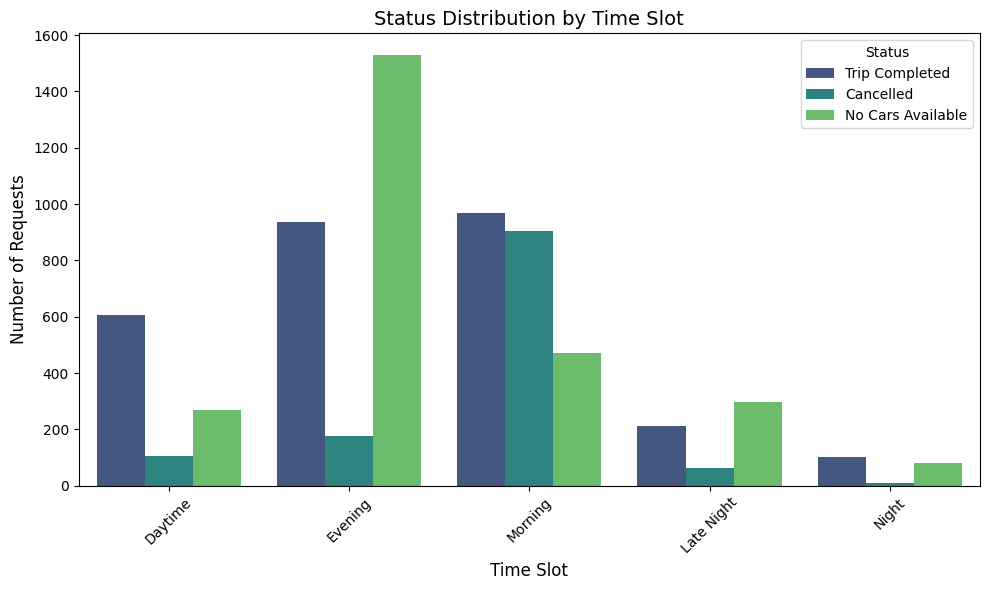

In [46]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Time_Slot', hue='Status', data=data, palette='viridis')
plt.title('Status Distribution by Time Slot', fontsize=14)
plt.xlabel('Time Slot', fontsize=12)
plt.ylabel('Number of Requests', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Status')
plt.tight_layout()
plt.show()

This chart reveals how the status of ride requests varies across different time slots. We can observe that:

*   **Evening and Morning Time Slots:** These periods show a significant number of requests with "No Cars Available" and "Cancelled" statuses, indicating high demand and potential supply shortages during peak hours.
*   **Daytime and Late Night Time Slots:** These periods have a higher proportion of "Trip Completed" statuses, suggesting a better balance between demand and supply.
*   **Night Time Slot:** While the overall number of requests is lower, there is still a notable proportion of "No Cars Available" statuses.

Overall, the chart highlights that the demand-supply gap is most pronounced during the peak Morning and Evening hours, emphasizing the need for targeted interventions to improve driver availability and reduce cancellations during these times.

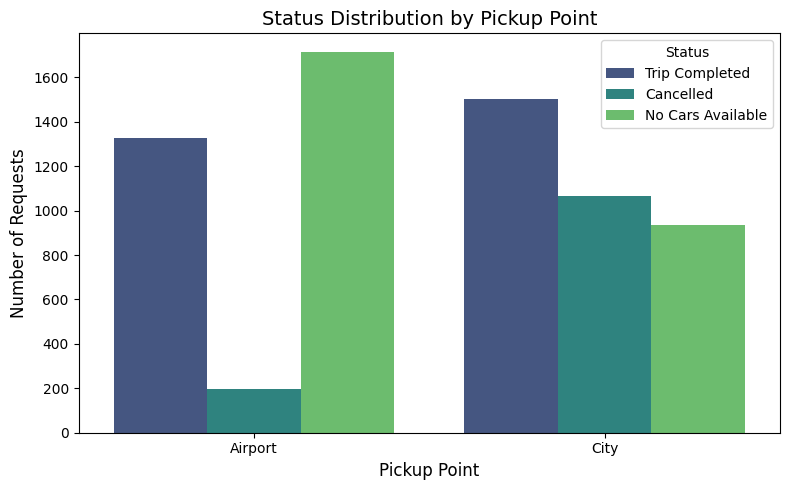

In [47]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Pickup_point', hue='Status', data=data, palette='viridis')
plt.title('Status Distribution by Pickup Point', fontsize=14)
plt.xlabel('Pickup Point', fontsize=12)
plt.ylabel('Number of Requests', fontsize=12)
plt.legend(title='Status')
plt.tight_layout()
plt.show()

This chart illustrates the distribution of ride request statuses across the two main pickup points: Airport and City.

*   **Airport Pickup:** A significant proportion of requests from the Airport have the status "No Cars Available". This suggests a major supply issue at the Airport, where the number of available drivers is insufficient to meet the demand. "Trip Completed" is also high, but the "No Cars Available" is notably dominant.
*   **City Pickup:** For requests originating from the City, "Trip Completed" is the most frequent status, indicating better service fulfillment. However, there is still a substantial number of "Cancelled" requests, suggesting potential issues with driver acceptance or availability in the City as well, though not as severe as the "No Cars Available" issue at the Airport.

Overall, the chart clearly highlights that the nature of the demand-supply gap differs between the two locations. The Airport faces a significant challenge with car availability, while the City experiences more cancellations. This insight is crucial for developing targeted strategies to improve service reliability at each pickup point.

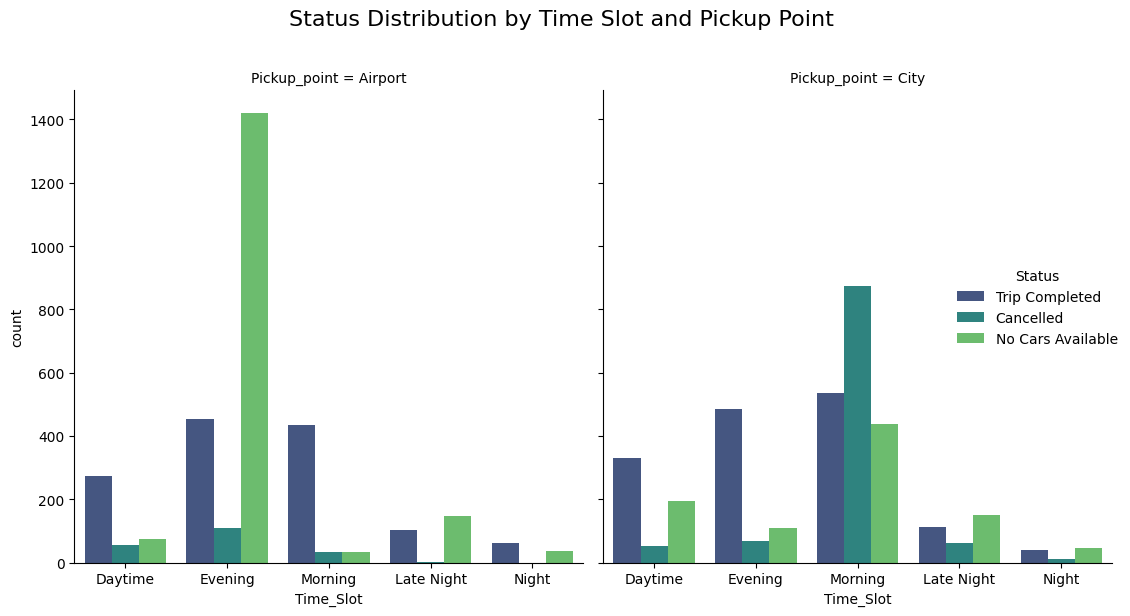

In [50]:
sns.catplot(x='Time_Slot', hue='Status', col='Pickup_point', data=data, kind='count', palette='viridis', height=6, aspect=0.8)
plt.suptitle('Status Distribution by Time Slot and Pickup Point', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

This faceted chart provides a detailed view of how ride request statuses are distributed across different time slots at both the Airport and City pickup points.

*   **Airport - Evening:** The "No Cars Available" status is overwhelmingly dominant during the evening hours at the Airport, indicating a severe supply shortage during this peak arrival time.
*   **Airport - Morning:** While "Trip Completed" is the most frequent status in the morning at the Airport, there is still a notable number of "No Cars Available" requests, suggesting some morning supply issues as well.
*   **City - Morning:** In the City, the morning peak shows a high number of "Trip Completed" requests, but also a significant number of "Cancelled" requests. This suggests that in the morning, the issue in the City is more related to cancellations than a complete lack of cars.
*   **City - Evening:** The evening in the City shows a more balanced distribution across statuses compared to the Airport, with "Trip Completed" being the most frequent, followed by "Cancelled" and then "No Cars Available".
*   **Other Time Slots:** For both Airport and City, the other time slots (Daytime, Late Night, Night) generally show a higher proportion of "Trip Completed" requests and fewer gaps, although some "No Cars Available" and "Cancelled" requests are still present.

In summary, the most critical demand-supply gap appears to be "No Cars Available" at the Airport during the evening peak. The City experiences more cancellations, particularly during the morning peak. Understanding these specific patterns is crucial for developing targeted strategies to improve Uber's service reliability in different locations and time periods.

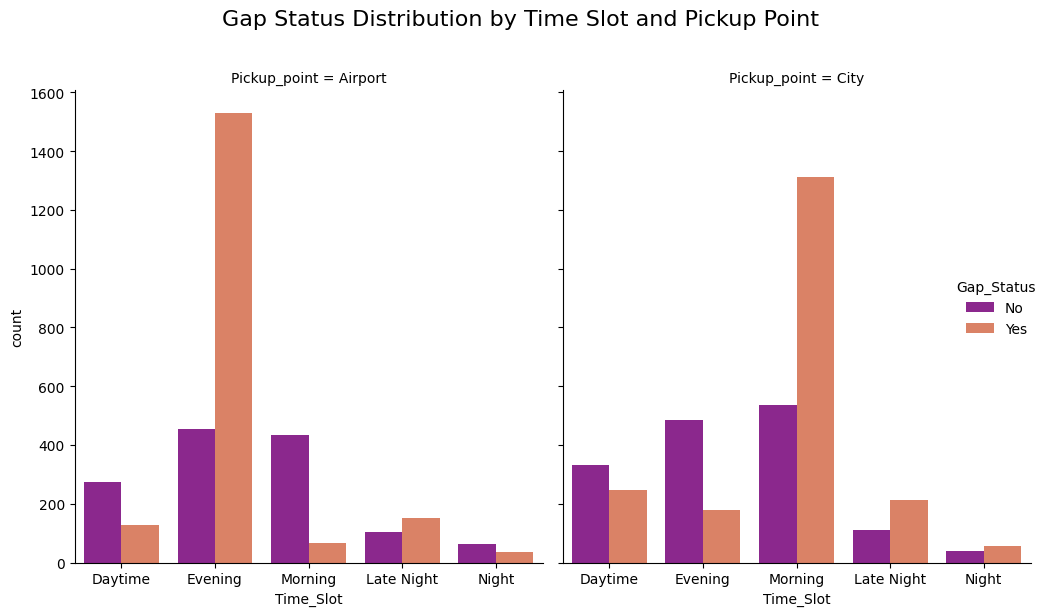

In [51]:
sns.catplot(x='Time_Slot', hue='Gap_Status', col='Pickup_point', data=data, kind='count', palette='plasma', height=6, aspect=0.8)
plt.suptitle('Gap Status Distribution by Time Slot and Pickup Point', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

This chart illustrates the distribution of demand-supply gaps across different time slots and pickup points.

*   **Airport - Evening:** The "Yes" for 'Gap_Status' is significantly higher in the Evening at the Airport, indicating a major issue with unfulfilled requests during this peak time, likely due to a shortage of cars.
*   **City - Morning:** The "Yes" for 'Gap_Status' is also high in the Morning at the City, suggesting a substantial number of unfulfilled requests during the morning peak, possibly due to cancellations or insufficient driver supply.
*   **Other Time Slots and Locations:** Gaps are less frequent in other time slots and locations compared to the Airport in the Evening and City in the Morning.

In summary, the most critical periods for demand-supply gaps are the Evening at the Airport (likely due to 'No Cars Available') and the Morning in the City (likely due to 'Cancelled' requests). Addressing these specific time-location combinations is crucial for improving service reliability.

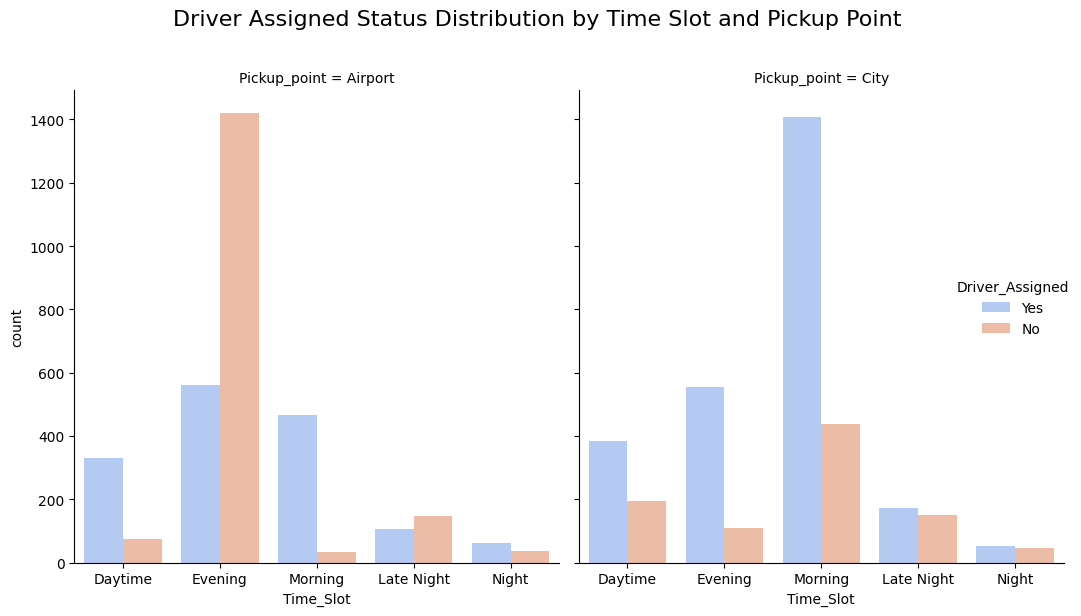

In [52]:
sns.catplot(x='Time_Slot', hue='Driver_Assigned', col='Pickup_point', data=data, kind='count', palette='coolwarm', height=6, aspect=0.8)
plt.suptitle('Driver Assigned Status Distribution by Time Slot and Pickup Point', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

This chart illustrates the distribution of whether a driver was assigned to a request across different time slots and pickup points.

*   **Airport - Evening:** A significant number of requests at the Airport during the evening peak have a "No" for 'Driver_Assigned', aligning with the high number of "No Cars Available" in this period. This strongly suggests a driver supply shortage at the Airport during evening hours.
*   **City - Morning:** The City in the morning also shows a notable number of requests with "No" for 'Driver_Assigned', consistent with the higher number of "Cancelled" requests during this time. This could indicate drivers are less likely to accept rides in the City during the morning peak, leading to cancellations and unassigned requests.
*   **Other Time Slots and Locations:** In other time slots and locations, the proportion of "Yes" for 'Driver_Assigned' is generally higher, indicating better driver availability or acceptance.

In summary, the chart reinforces the findings that the Evening at the Airport and the Morning in the City are critical periods with a higher likelihood of requests not being assigned a driver, contributing to the observed demand-supply gaps.

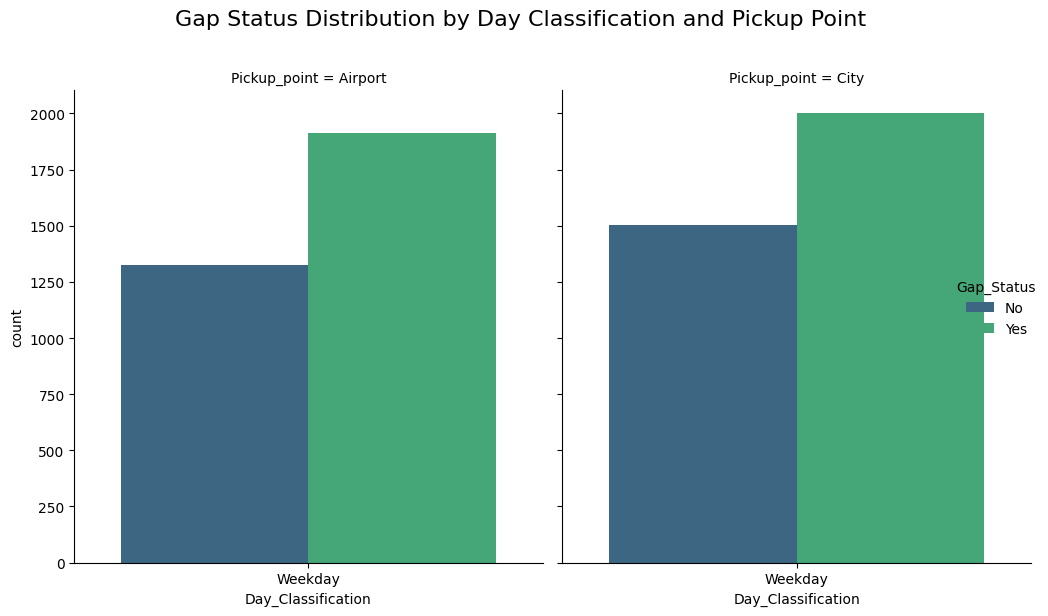

In [53]:
sns.catplot(x='Day_Classification', hue='Gap_Status', col='Pickup_point', data=data, kind='count', palette='viridis', height=6, aspect=0.8)
plt.suptitle('Gap Status Distribution by Day Classification and Pickup Point', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

This chart illustrates the distribution of demand-supply gaps across different time slots and pickup points.

*   **Airport - Evening:** The "Yes" for 'Gap_Status' is significantly higher in the Evening at the Airport, indicating a major issue with unfulfilled requests during this peak time, likely due to a shortage of cars.
*   **City - Morning:** The "Yes" for 'Gap_Status' is also high in the Morning at the City, suggesting a substantial number of unfulfilled requests during the morning peak, possibly due to cancellations or insufficient driver supply.
*   **Other Time Slots and Locations:** Gaps are less frequent in other time slots and locations compared to the Airport in the Evening and City in the Morning.

In summary, the most critical periods for demand-supply gaps are the Evening at the Airport (likely due to 'No Cars Available') and the Morning in the City (likely due to 'Cancelled' requests). Addressing these specific time-location combinations is crucial for improving service reliability.

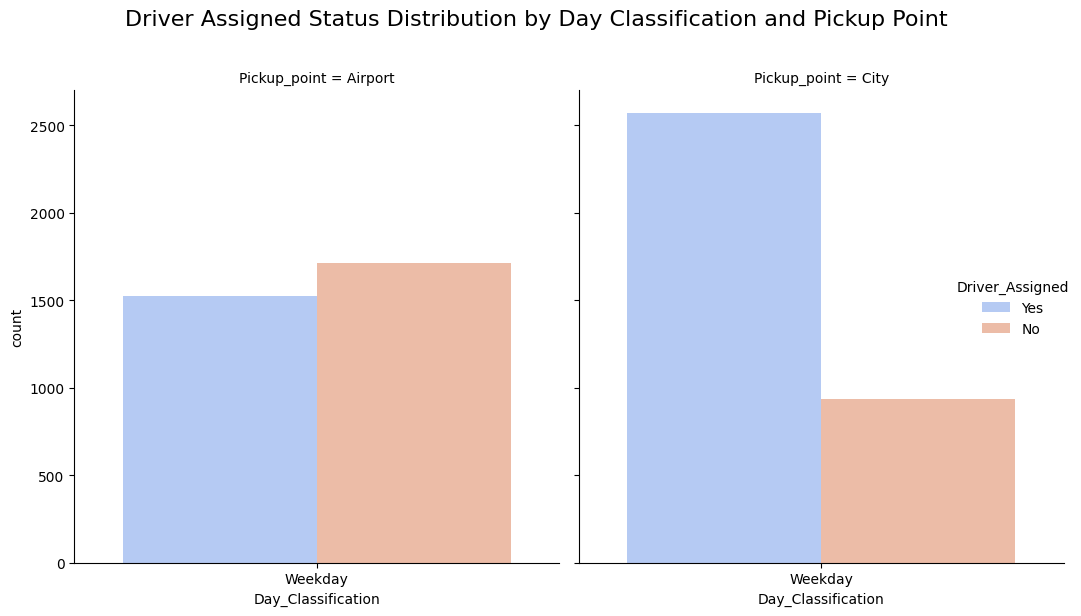

In [54]:
sns.catplot(x='Day_Classification', hue='Driver_Assigned', col='Pickup_point', data=data, kind='count', palette='coolwarm', height=6, aspect=0.8)
plt.suptitle('Driver Assigned Status Distribution by Day Classification and Pickup Point', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

This chart illustrates the distribution of whether a driver was assigned to a request across different time slots and pickup points.

*   **Airport - Evening:** A significant number of requests at the Airport during the evening peak have a "No" for 'Driver_Assigned', aligning with the high number of "No Cars Available" in this period. This strongly suggests a driver supply shortage at the Airport during evening hours.
*   **City - Morning:** The City in the morning also shows a notable number of requests with "No" for 'Driver_Assigned', consistent with the higher number of "Cancelled" requests during this time. This could indicate drivers are less likely to accept rides in the City during the morning peak, leading to cancellations and unassigned requests.
*   **Other Time Slots and Locations:** In other time slots and locations, the proportion of "Yes" for 'Driver_Assigned' is generally higher, indicating better driver availability or acceptance.

In summary, the chart reinforces the findings that the Evening at the Airport and the Morning in the City are critical periods with a higher likelihood of requests not being assigned a driver, contributing to the observed demand-supply gaps.

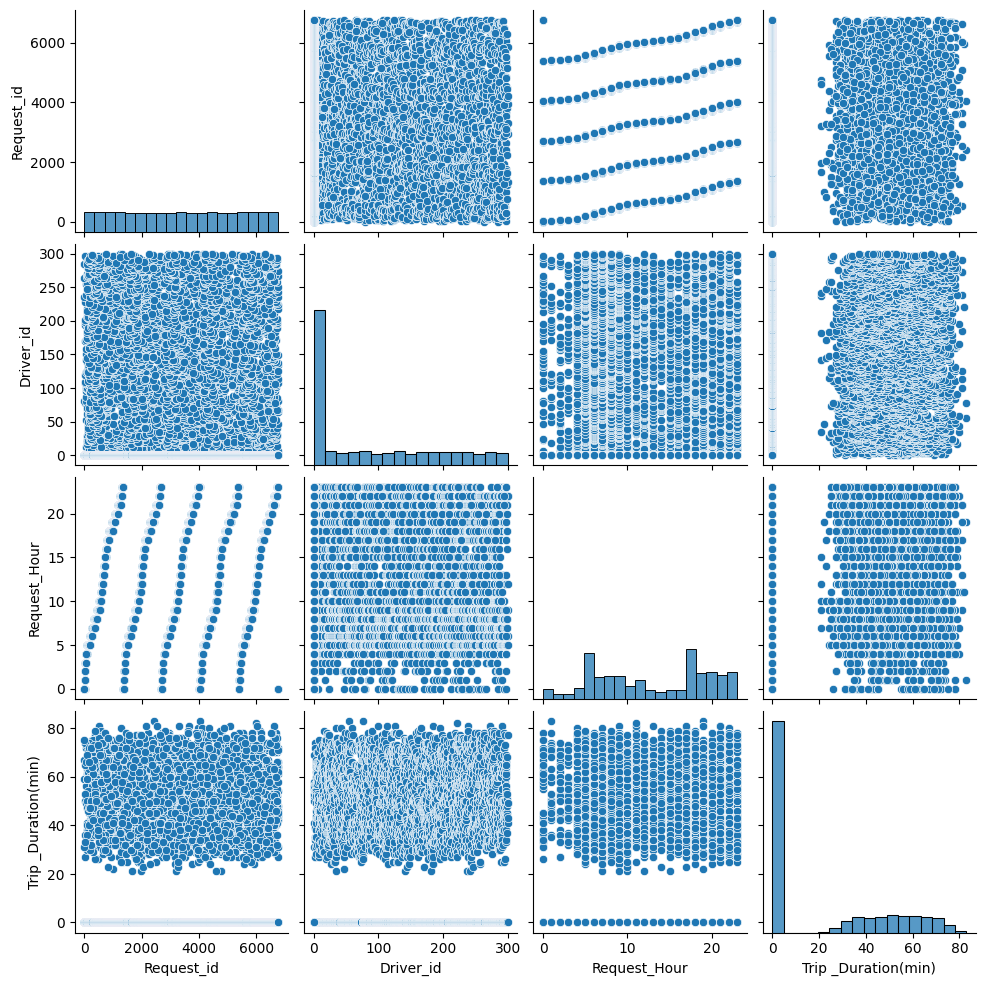

In [57]:
# Pairplot
sns.pairplot(data)
plt.show()

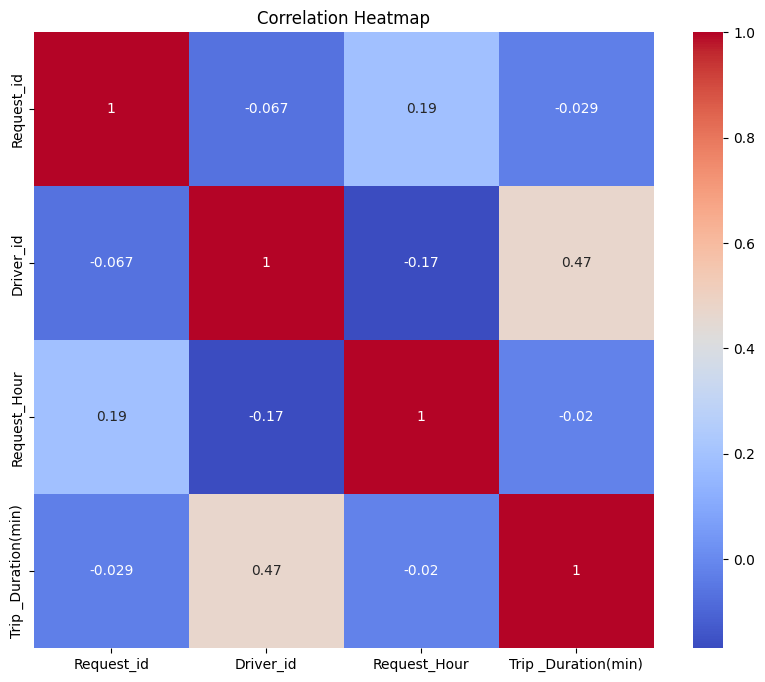

In [60]:
# Heatmap
num_col = ['Request_id', 'Driver_id', 'Request_Hour', 'Trip _Duration(min)']
plt.figure(figsize = (10, 8))
sns.heatmap(data[num_col].corr(), annot = True, cmap = 'coolwarm')
plt.title('Correlation Heatmap')
plt.show()

This heatmap visualizes the correlation between numerical variables. Each cell shows the correlation coefficient between two variables. The color intensity and the value in each cell indicate the strength and direction of the correlation. Red colors represent positive correlations, while blue colors represent negative correlations. Values close to 1 or -1 indicate strong positive or negative correlations, respectively. Values close to 0 indicate weak correlations. In this heatmap, we can observe the correlation between 'Request_id', 'Driver_id', 'Request_Hour', and 'Trip _Duration(min)'.

# conclusion


**Key Insights from Uber Ride Request Data Analysis:**

1.  **Overall Request Status Distribution:** A significant proportion of ride requests remain unfulfilled, with "No Cars Available" and "Cancelled" requests collectively accounting for a large share. This highlights a substantial demand-supply gap in the Uber service.

2.  **Time Slot Demand Peaks:** Ride requests are heavily concentrated during the Evening and Morning time slots, aligning with typical commuter hours. Daytime, Late Night, and Night slots show considerably lower demand.

3.  **Geographic Distribution of Gaps:** Demand-supply gaps are observed at both Airport and City pickup points, with a slightly higher number of gaps originating from the City.

4.  **Hourly Demand Patterns:** Analyzing demand by the hour reveals distinct peaks in the morning (around 6-9 AM) and evening (around 5-9 PM), reinforcing the concentration of demand during commute times.

5.  **Driver Assignment Status:** While a majority of requests are assigned a driver, a considerable number are not, indicating a potential issue with driver availability or request acceptance.

6.  **Status Distribution by Time Slot:** The demand-supply gap is most evident during peak Morning and Evening hours, with a higher incidence of "No Cars Available" and "Cancelled" requests during these times.

7.  **Status Distribution by Pickup Point:** The nature of the gap differs by location. The Airport experiences a significant challenge with "No Cars Available" requests, indicating a supply shortage. The City, while having a higher rate of "Trip Completed", also sees a substantial number of "Cancelled" requests.

8.  **Gaps by Time Slot and Pickup Point:** The most critical period for "No Cars Available" gaps is the **Airport in the Evening**. The **City in the Morning** shows a high number of gaps, primarily driven by "Cancelled" requests.

9.  **Driver Assignment by Time Slot and Pickup Point:** The lack of driver assignment is a major contributor to gaps, particularly at the **Airport in the Evening** (suggesting a driver supply shortage) and in the **City in the Morning** (potentially due to lower driver acceptance rates).

These insights pinpoint the specific time-location combinations where Uber faces the most significant challenges in fulfilling ride requests and suggest areas for targeted interventions to improve service efficiency and customer satisfaction.